In [ ]:
!pip install xgboost

In [ ]:
import xgboost
print("xgboost", xgboost.__version__)

import pandas as pd
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')


xgboost 2.0.1
Mounted at /content/drive


In [ ]:
data_2015 = pd.read_csv('/content/drive/My Drive/charging modeling/2015 Actual Generation per Production Type.csv')
df_2015 = pd.DataFrame(data_2015)
data_2016 = pd.read_csv('/content/drive/My Drive/charging modeling/2016 Actual Generation per Production Type.csv')
df_2016 = pd.DataFrame(data_2016)
data_2017 = pd.read_csv('/content/drive/My Drive/charging modeling/2017 Actual Generation per Production Type.csv')
df_2017 = pd.DataFrame(data_2017)
data_2018 = pd.read_csv('/content/drive/My Drive/charging modeling/2018 Actual Generation per Production Type.csv')
df_2018 = pd.DataFrame(data_2018)

data_2019 = pd.read_csv('/content/drive/My Drive/charging modeling/2019 Actual Generation per Production Type.csv')
df_2019 = pd.DataFrame(data_2019)

data_2020 = pd.read_csv('/content/drive/My Drive/charging modeling/2020 Actual Generation per Production Type.csv')
df_2020 = pd.DataFrame(data_2020)

data_2021 = pd.read_csv('/content/drive/My Drive/charging modeling/2021 Actual Generation per Production Type.csv')
df_2021 = pd.DataFrame(data_2021)

data_2022 = pd.read_csv('/content/drive/My Drive/charging modeling/2022 Actual Generation per Production Type.csv')
df_2022 = pd.DataFrame(data_2022)

data_2023 = pd.read_csv('/content/drive/My Drive/charging modeling/2023 Actual Generation per Production Type.csv')
df_2023 = pd.DataFrame(data_2023)

df_2023= df_2023[:29941] # truncating our data at 08.11.2023 19:45 - 08.11.2023 20:00 (CET/CEST) since ENTSOE weirdly has teh whole year on CSV still even tho its not over yet


In [ ]:
# Concatenate the dataframes
frames = [df_2015,df_2016,df_2017,df_2018,df_2019, df_2020, df_2021, df_2022, df_2023]
result = pd.concat(frames, ignore_index=True)


In [ ]:
main_df = result.drop(['Area', 'Other  - Actual Aggregated [MW]', 'Other renewable  - Actual Aggregated [MW]'], axis=1)
main_df.replace('n/e', 0, inplace=True)
main_df.replace('-', 0, inplace=True)
main_df.replace('NaN', 0, inplace=True)


In [ ]:
main_df.columns

Index(['MTU', 'Biomass  - Actual Aggregated [MW]',
       'Fossil Brown coal/Lignite  - Actual Aggregated [MW]',
       'Fossil Coal-derived gas  - Actual Aggregated [MW]',
       'Fossil Gas  - Actual Aggregated [MW]',
       'Fossil Hard coal  - Actual Aggregated [MW]',
       'Fossil Oil  - Actual Aggregated [MW]',
       'Fossil Oil shale  - Actual Aggregated [MW]',
       'Fossil Peat  - Actual Aggregated [MW]',
       'Geothermal  - Actual Aggregated [MW]',
       'Hydro Pumped Storage  - Actual Aggregated [MW]',
       'Hydro Pumped Storage  - Actual Consumption [MW]',
       'Hydro Run-of-river and poundage  - Actual Aggregated [MW]',
       'Hydro Water Reservoir  - Actual Aggregated [MW]',
       'Marine  - Actual Aggregated [MW]', 'Nuclear  - Actual Aggregated [MW]',
       'Solar  - Actual Aggregated [MW]', 'Waste  - Actual Aggregated [MW]',
       'Wind Offshore  - Actual Aggregated [MW]',
       'Wind Onshore  - Actual Aggregated [MW]'],
      dtype='object')

In [ ]:
columns_to_sum = ['Biomass  - Actual Aggregated [MW]',
       'Fossil Brown coal/Lignite  - Actual Aggregated [MW]',
       'Fossil Coal-derived gas  - Actual Aggregated [MW]',
       'Fossil Gas  - Actual Aggregated [MW]',
       'Fossil Hard coal  - Actual Aggregated [MW]',
       'Fossil Oil  - Actual Aggregated [MW]',
       'Fossil Oil shale  - Actual Aggregated [MW]',
       'Fossil Peat  - Actual Aggregated [MW]',
       'Geothermal  - Actual Aggregated [MW]',
       'Hydro Pumped Storage  - Actual Aggregated [MW]',
       'Hydro Pumped Storage  - Actual Consumption [MW]',
       'Hydro Run-of-river and poundage  - Actual Aggregated [MW]',
       'Hydro Water Reservoir  - Actual Aggregated [MW]',
       'Marine  - Actual Aggregated [MW]', 'Nuclear  - Actual Aggregated [MW]',
       'Solar  - Actual Aggregated [MW]', 'Waste  - Actual Aggregated [MW]',
       'Wind Offshore  - Actual Aggregated [MW]',
       'Wind Onshore  - Actual Aggregated [MW]']

total = []
for i, r in main_df.iterrows():
    prev = 0
    for column in columns_to_sum:
      try:
        prev += int(r[column])
      except ValueError:
        prev+=0

    total.append(prev)

main_df['Total_MW'] = total


In [ ]:
# adding up the energy produced over 24 hours in a day

all = []
counter =0
prev_val = 0
for i, r in main_df.iterrows():
    if counter == 95: # tech 96 = 4*24
      all.append(prev_val)
      counter = 0
      prev_val = 0
    else:
      prev_val += r['Total_MW']
      all.append(0)
      counter += 1
main_df['Daily_Total_MW'] = all


In [ ]:
daily_df = main_df

In [ ]:
# adding up the energy produced over 24 hours in a day for each energysource
columns_to_sum = ['Biomass  - Actual Aggregated [MW]',
       'Fossil Brown coal/Lignite  - Actual Aggregated [MW]',
       'Fossil Coal-derived gas  - Actual Aggregated [MW]',
       'Fossil Gas  - Actual Aggregated [MW]',
       'Fossil Hard coal  - Actual Aggregated [MW]',
       'Fossil Oil  - Actual Aggregated [MW]',
       'Fossil Oil shale  - Actual Aggregated [MW]',
       'Fossil Peat  - Actual Aggregated [MW]',
       'Geothermal  - Actual Aggregated [MW]',
       'Hydro Pumped Storage  - Actual Aggregated [MW]',
       'Hydro Pumped Storage  - Actual Consumption [MW]',
       'Hydro Run-of-river and poundage  - Actual Aggregated [MW]',
       'Hydro Water Reservoir  - Actual Aggregated [MW]',
       'Marine  - Actual Aggregated [MW]', 'Nuclear  - Actual Aggregated [MW]',
       'Solar  - Actual Aggregated [MW]', 'Waste  - Actual Aggregated [MW]',
       'Wind Offshore  - Actual Aggregated [MW]',
       'Wind Onshore  - Actual Aggregated [MW]']


for column in columns_to_sum:
    all = []
    counter = 0
    prev_val = 0
    for i, r in main_df.iterrows():
        if counter == 95:  # 96 = 4*24
            all.append(prev_val)
            counter = 0
            prev_val = 0
        else:
            prev_val += float(r[column])
            all.append(0)
            counter += 1
    print(column)
    # Use .loc to modify the DataFrame
    daily_df.loc[:, column] = all


Biomass  - Actual Aggregated [MW]


<ipython-input-16-2f1da724cf57>:36: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  daily_df.loc[:, column] = all


Fossil Brown coal/Lignite  - Actual Aggregated [MW]
Fossil Coal-derived gas  - Actual Aggregated [MW]
Fossil Gas  - Actual Aggregated [MW]
Fossil Hard coal  - Actual Aggregated [MW]
Fossil Oil  - Actual Aggregated [MW]
Fossil Oil shale  - Actual Aggregated [MW]
Fossil Peat  - Actual Aggregated [MW]
Geothermal  - Actual Aggregated [MW]
Hydro Pumped Storage  - Actual Aggregated [MW]
Hydro Pumped Storage  - Actual Consumption [MW]
Hydro Run-of-river and poundage  - Actual Aggregated [MW]
Hydro Water Reservoir  - Actual Aggregated [MW]
Marine  - Actual Aggregated [MW]
Nuclear  - Actual Aggregated [MW]
Solar  - Actual Aggregated [MW]
Waste  - Actual Aggregated [MW]
Wind Offshore  - Actual Aggregated [MW]
Wind Onshore  - Actual Aggregated [MW]


In [ ]:
daily_df = main_df[main_df['Daily_Total_MW'] != 0] # only daily values here

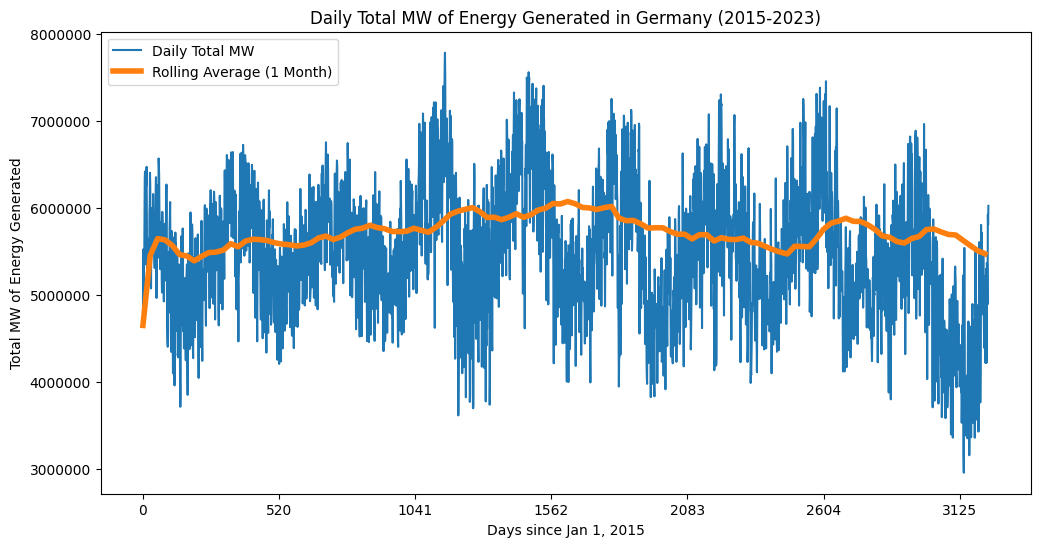

In [ ]:
import matplotlib.pyplot as plt

# Calculate the rolling average with a window size of 24 hours (1 day)
rolling_average = daily_df['Daily_Total_MW'][::7*4].rolling(window=24, min_periods=1).mean()

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Plot the rolling average
plt.plot(daily_df['Daily_Total_MW'], label='Daily Total MW')
plt.plot(rolling_average, label='Rolling Average (1 Month)', linewidth=4)
plt.xlabel('Days since Jan 1, 2015')
plt.ylabel('Total MW of Energy Generated')

# Set y-axis lower limit to 0
# plt.ylim(0, daily_df['Daily_Total_MW'].max())

plt.title('Daily Total MW of Energy Generated in Germany (2015-2023)')
plt.legend()

# Adjust x-axis ticks
ticks = plt.xticks()[0][1:len(plt.xticks()[0])-1]
new_ticks = [int(tick / 96) for tick in ticks]
plt.xticks(ticks, new_ticks)

plt.ticklabel_format(axis='y', style='plain')

plt.show()


In [ ]:
# Define a dictionary to map the current column names to shorter names
column_name_mapping = {
    'Biomass  - Actual Aggregated [MW]': 'Biomass',
    'Fossil Brown coal/Lignite  - Actual Aggregated [MW]': 'Brown Coal',
    'Fossil Coal-derived gas  - Actual Aggregated [MW]': 'Coal Gas',
    'Fossil Gas  - Actual Aggregated [MW]': 'Gas',
    'Fossil Hard coal  - Actual Aggregated [MW]': 'Hard Coal',
    'Fossil Oil  - Actual Aggregated [MW]': 'Oil',
    'Fossil Oil shale  - Actual Aggregated [MW]': 'Oil Shale',
    'Fossil Peat  - Actual Aggregated [MW]': 'Peat',
    'Geothermal  - Actual Aggregated [MW]': 'Geothermal',
    'Hydro Pumped Storage  - Actual Aggregated [MW]': 'Hydro Storage',
    'Hydro Pumped Storage  - Actual Consumption [MW]': 'Hydro Storage Consumption',
    'Hydro Run-of-river and poundage  - Actual Aggregated [MW]': 'Hydro Run-of-river',
    'Hydro Water Reservoir  - Actual Aggregated [MW]': 'Hydro Reservoir',
    'Marine  - Actual Aggregated [MW]': 'Marine',
    'Nuclear  - Actual Aggregated [MW]': 'Nuclear',
    'Solar  - Actual Aggregated [MW]': 'Solar',
    'Waste  - Actual Aggregated [MW]': 'Waste',
    'Wind Offshore  - Actual Aggregated [MW]': 'Wind Offshore',
    'Wind Onshore  - Actual Aggregated [MW]': 'Wind Onshore'
}

# Rename the columns based on the mapping
main_df = main_df.rename(columns=column_name_mapping)
daily_df = daily_df.rename(columns=column_name_mapping)


carbon_intensity_estimates = {
    'Biomass': 230,   # researched
    'Brown Coal': 820,# researched
    'Coal Gas': 700,
    'Gas': 490, # researched
    'Hard Coal': 900,
    'Oil': 970, # researched
    'Oil Shale': 750,
    'Peat': 600,
    'Geothermal': 38,
    'Hydro Storage': 30,
    'Hydro Storage Consumption': 30,
    'Hydro Run-of-river': 30,
    'Hydro Reservoir': 40,
    'Marine': 100,
    'Nuclear': 12, # researched
    'Solar': 40, # researched
    'Waste': 500,
    'Wind Offshore': 12, # researched
    'Wind Onshore': 11 # researched
}

In [ ]:

### graph this
carbon_intensity_estimates = {
    'Biomass': 230,   # researched
    'Brown Coal': 820,# researched
    'Coal Gas': 700,
    'Gas': 490, # researched
    'Hard Coal': 900,
    'Oil': 970, # researched
    'Oil Shale': 750,
    'Peat': 600,
    'Geothermal': 38,
    'Hydro Storage': 30,
    'Hydro Storage Consumption': 30,
    'Hydro Run-of-river': 30,
    'Hydro Reservoir': 40,
    'Marine': 100,
    'Nuclear': 12, # researched
    'Solar': 40, # researched
    'Waste': 500,
    'Wind Offshore': 12, # researched
    'Wind Onshore': 11 # researched
}


# https://www.epa.gov/sites/default/files/2015-07/documents/emission-factors_2014.pdf
# Methane Emission Factors (MEF) estimates for each energy source (in g/kWh)
methane_intensity_estimates = {
    'Biomass': 0.001,   # Placeholder values, please replace with researched data
    'Brown Coal': 0.003,  # Placeholder values, please replace with researched data
    'Coal Gas': 0.003,   # Placeholder values, please replace with researched data
    'Gas': 0.003,        # Placeholder values, please replace with researched data
    'Hard Coal': 0.003,   # Placeholder values, please replace with researched data
    'Oil': 0.009,        # Placeholder values, please replace with researched data
    'Oil Shale': 0.009,   # Placeholder values, please replace with researched data
    'Peat': 0.009,
    'Geothermal': 0,  # Placeholder values, please replace with researched data
    'Hydro Storage': 0,
    'Hydro Storage Consumption': 0,
    'Hydro Run-of-river': 0,
    'Hydro Reservoir': 0,
    'Marine': 0.001,     # Placeholder values, please replace with researched data
    'Nuclear': 0,     # Placeholder values, please replace with researched data
    'Solar': 0,       # Placeholder values, please replace with researched data
    'Waste': 0.009,
    'Wind Offshore': 0,  # Placeholder values, please replace with researched data
    'Wind Onshore': 0   # Placeholder values, please replace with researched data
}



In [ ]:
# calculating carbon intensity
co2_intensities = []
for ind, row in daily_df.iterrows():
  aggregrate_carbon_intensity = 0
  if not (row['Daily_Total_MW'])==0:
    for column in main_df.columns:
      if (column not in ['MTU', 'Total_MW','CO2_Intensity','Daily_Total_MW']):
        if row[column] == '-':
          print(row)
         # multiplying the emission amount (WH) proportion of total by emission factor (gCO2eq/kwh)
        aggregrate_carbon_intensity += ((float(row[column])/float(row['Daily_Total_MW'])) * float(carbon_intensity_estimates[column]))
    co2_intensities.append(aggregrate_carbon_intensity)
  else:
    co2_intensities.append(0)

In [ ]:
# calculating carbon intensity
m_intensities = []
for ind, row in daily_df.iterrows():
  aggregrate_carbon_intensity = 0
  if not (row['Daily_Total_MW'])==0:
    for column in main_df.columns:
      if (column not in ['MTU', 'Total_MW','CO2_Intensity','Daily_Total_MW']):
        if row[column] == '-':
          print(row)
         # multiplying the emission amount (WH) proportion of total by emission factor (gCO2eq/kwh)
        aggregrate_carbon_intensity += ((float(row[column])/float(row['Daily_Total_MW'])) * float(methane_intensity_estimates[column]))
    m_intensities.append(aggregrate_carbon_intensity)
  else:
    m_intensities.append(0)

In [ ]:
# main_df['CO2 Intensity'] = co2_intensities
daily_df['CO2 Intensity'] = co2_intensities
daily_df['CH4 Intensity'] = m_intensities

In [ ]:
daily_df.to_csv('all_daily_data.csv')

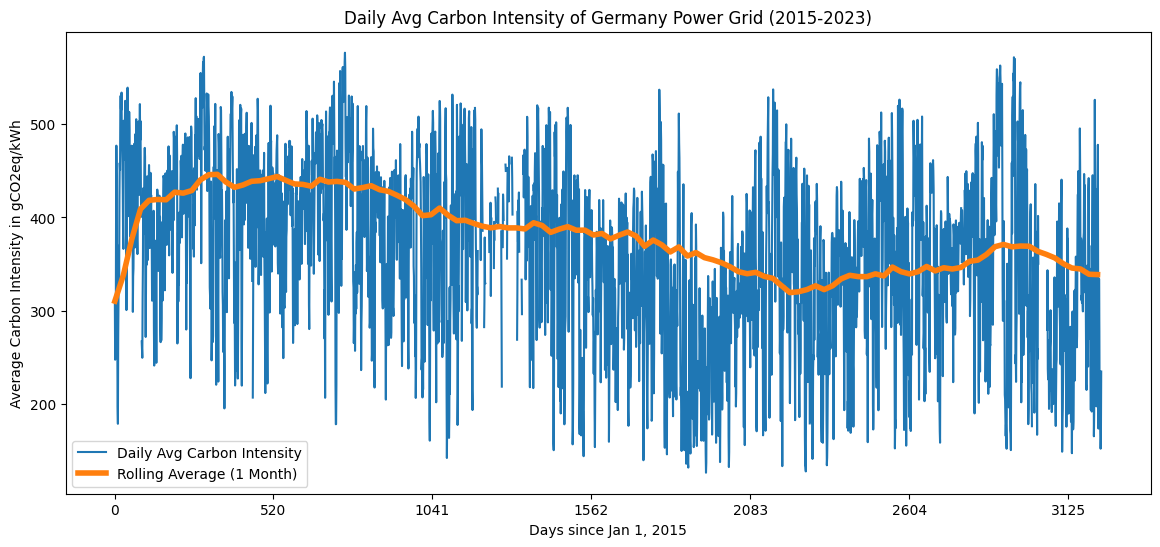

In [ ]:
# Calculate the rolling average with a window size of 24 hours (1 day)
rolling_average = daily_df['CO2 Intensity'][::7*4].rolling(window=24, min_periods=1).mean()

# Set the size of the plot
plt.figure(figsize=(14, 6))

# Plot the rolling average
plt.plot(daily_df['CO2 Intensity'], label='Daily Avg Carbon Intensity')
plt.plot(rolling_average, label='Rolling Average (1 Month)', linewidth=4)
plt.xlabel('Days since Jan 1, 2015')
plt.ylabel('Average Carbon Intensity in gCO2eq/kWh')

# Set y-axis lower limit to 0
# plt.ylim(0, daily_df['Daily_Total_MW'].max())

plt.title('Daily Avg Carbon Intensity of Germany Power Grid (2015-2023)')
plt.legend()

# Adjust x-axis ticks
ticks = plt.xticks()[0][1:len(plt.xticks()[0])-1]
new_ticks = [int(tick / 96) for tick in ticks]
plt.xticks(ticks, new_ticks)

plt.ticklabel_format(axis='y', style='plain')

plt.show()

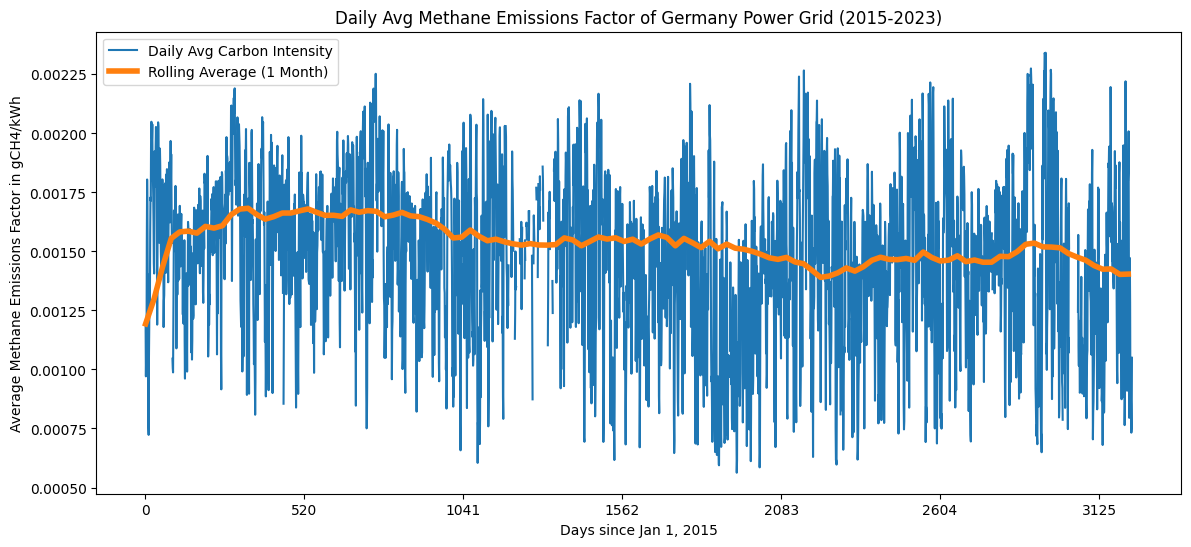

In [ ]:
# Calculate the rolling average with a window size of 24 hours (1 day)
rolling_average = daily_df['CH4 Intensity'][::7*4].rolling(window=24, min_periods=1).mean()

# Set the size of the plot
plt.figure(figsize=(14, 6))

# Plot the rolling average
plt.plot(daily_df['CH4 Intensity'], label='Daily Avg Carbon Intensity')
plt.plot(rolling_average, label='Rolling Average (1 Month)', linewidth=4)
plt.xlabel('Days since Jan 1, 2015')
plt.ylabel('Average Methane Emissions Factor in gCH4/kWh')

# Set y-axis lower limit to 0
# plt.ylim(0, daily_df['Daily_Total_MW'].max())

plt.title('Daily Avg Methane Emissions Factor of Germany Power Grid (2015-2023)')
plt.legend()

# Adjust x-axis ticks
ticks = plt.xticks()[0][1:len(plt.xticks()[0])-1]
new_ticks = [int(tick / 96) for tick in ticks]
plt.xticks(ticks, new_ticks)

plt.ticklabel_format(axis='y', style='plain')

plt.show()

In [ ]:
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot
import numpy as np

>expected=406.03894949058207, predicted=287.41995
>expected=293.3172368183072, predicted=348.46057
>expected=276.7179412565015, predicted=387.61523
>expected=207.7036770723543, predicted=285.899
>expected=197.60841689616646, predicted=353.6063
>expected=423.1167986735162, predicted=431.3919
>expected=429.93542679755325, predicted=355.67477
>expected=421.4247207753009, predicted=232.17784
>expected=433.48438637004097, predicted=226.67375
>expected=477.84550007094583, predicted=294.2634
>expected=318.75968218391824, predicted=271.39008
>expected=173.76009450421148, predicted=301.7073
>expected=208.98650156565537, predicted=333.7574
>expected=334.339102400592, predicted=420.21902
>expected=278.99865327207243, predicted=370.67746
>expected=174.44454750449145, predicted=364.52213
>expected=196.9218189710084, predicted=380.8985
>expected=177.87778144236336, predicted=435.80426
>expected=152.2273962701804, predicted=364.5322
>expected=163.87334459193696, predicted=405.96008
>expected=234.9247

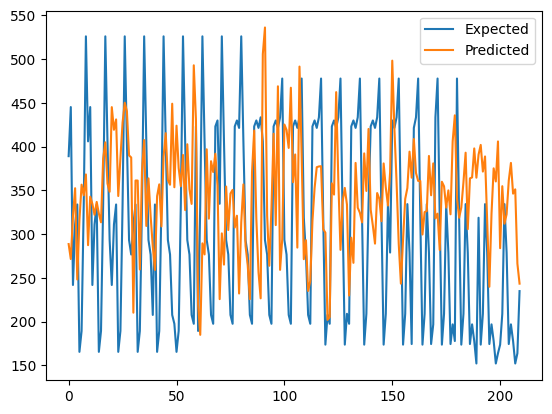

In [ ]:
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols = list()

    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))

    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))

    # put it all together
    agg = concat(cols, axis=1)

    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)

    return agg.values

# split a univariate dataset into train/test sets
def train_test_split(data, n_test, n_steps):
    return data[:-n_test - n_steps + 1, :], data[-n_test - n_steps + 1:, :]

# fit an xgboost model and make a multi-step prediction
def xgboost_forecast(train, testX, n_steps):
    # transform list into array
    train = asarray(train)
    # split into input and output columns
    trainX, trainy = train[:, :-n_steps], train[:, -n_steps:]

    # fit model
    model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
    model.fit(trainX, trainy)

    # make a multi-step prediction
    yhat = model.predict(asarray([testX]))
    return yhat[0]

def multi_step_walk_forward_validation(data, n_test, n_steps):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test, n_steps)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # split test row into input and output columns
        testX, testy = test[i, :-n_steps], test[i, -n_steps:]
        # fit model on history and make a prediction
        yhat = xgboost_forecast(history, testX, n_steps)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
        # summarize progress
        print('>expected=%s, predicted=%s' % (testy[-1], yhat[-1]))

    # estimate prediction error
    error = mean_absolute_error(test[:, -n_steps:], predictions)

    # Convert predictions list to NumPy array
    predictions = np.array(predictions)

    return error, test[:, -n_steps:], predictions


# load the dataset
values = daily_df[['CO2 Intensity']]
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=6, n_out=10)  # Adjusted for 10-step forecast
# evaluate
n_steps = 10

mae, y, yhat = multi_step_walk_forward_validation(data, 12, n_steps)
print('MAE: %.3f' % mae)
# plot expected vs predicted
pyplot.plot(y.flatten(), label='Expected')
pyplot.plot(yhat.flatten(), label='Predicted')
pyplot.legend()
pyplot.show()

In [ ]:
# finalize model and make a prediction for monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from xgboost import XGBRegressor

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    print(f"Original data shape: {data.shape}")

    # Use the values attribute to get a NumPy array
    data_array = data.values.reshape(-1, 1)

    n_vars = 1 if type(data) is list else data_array.shape[1]
    df = DataFrame(data_array)
    cols = list()

    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))

    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))

    # put it all together
    agg = concat(cols, axis=1)

    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)

    print(f"Transformed data shape: {agg.shape}")
    return agg.values


# load the dataset
values = daily_df['CO2 Intensity']
# transform the time series data into supervised learning
train = series_to_supervised(values, n_in=10)
# split into input and output columns
trainX, trainy = train[:, :-1], train[:, -1]
# fit model
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(trainX, trainy)



Original data shape: (3234,)
Transformed data shape: (2905, 11)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:

# construct an input for a new prediction
row = values[:-1][-10:].values.flatten()
# make a one-step prediction
yhat = model.predict(asarray([row]))
print('Input: %s, Predicted: %.3f' % (row, yhat[0]))



Input: [173.7600945  208.98650157 334.3391024  278.99865327 174.4445475
 196.92181897 177.87778144 152.22739627 163.87334459 234.92478612], Predicted: 275.704


In [ ]:
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from xgboost import XGBRegressor

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    print(f"Original data shape: {data.shape}")

    # Use the values attribute to get a NumPy array
    data_array = data.values.reshape(-1, 1)

    n_vars = 1 if type(data) is list else data_array.shape[1]
    df = DataFrame(data_array)
    cols = list()

    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))

    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))

    # put it all together
    agg = concat(cols, axis=1)

    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)

    print(f"Transformed data shape: {agg.shape}")
    return agg.values

# Load the dataset
values = daily_df['CO2 Intensity'][:-1]
# Transform the time series data into supervised learning
train = series_to_supervised(values, n_in=10)
# Split into input and output columns
trainX, trainy = train[:, :-1], train[:, -1]

# Initialize the model
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)

# Number of iterations
n_iterations = 100

# Make iterative predictions
for i in range(n_iterations):
    # Fit the model with the current data
    model.fit(trainX, trainy)

    # Construct an input for a new prediction
    row = values[-10:].values.flatten()

    # Make a one-step prediction
    yhat = model.predict(asarray([row]))

    print('Iteration %d, Predicted: %.3f' % (i+1, yhat[0]))

    # Append the new prediction to the training data for the next iteration
    row_array = np.array([row])
    trainX = np.concatenate((row_array, trainX), axis=0)
    trainy = np.concatenate(([yhat[0]], trainy), axis=0)


In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Create the XGBRegressor
model = XGBRegressor(objective='reg:squarederror')

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_absolute_error', cv=3)

# Fit the grid search to the data
grid_result = grid_search.fit(trainX, trainy)

# Print the best parameters and corresponding MAE
print("Best Parameters: ", grid_result.best_params_)
print("Best MAE: ", -grid_result.best_score_)

Best Parameters:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
Best MAE:  48.09832294625735


In [ ]:
from math import sqrt
from multiprocessing import cpu_count
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Direct method for SARIMA forecast
# A new model for every prediction
def sarima_forecast(history, config):
    order, sorder, trend = config
    # define model
    model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
    # fit model
    model_fit = model.fit(disp=False)
    # make one step forecast
    yhat = model_fit.predict(len(history), len(history))
    return yhat[0]

def mean_absolute_percentage_error(y_true, y_pred):
    '''Take in true and predicted values and calculate the MAPE score.'''
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# root mean squared error or rmse
def measure_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]


# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # fit model and make forecast for history
        yhat = sarima_forecast(history, cfg)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add only the value (not the index) to history for the next loop
        history.append(test.iloc[i])  # Change this line
    # estimate prediction error
    error = mean_absolute_percentage_error(test, predictions)
    return predictions, error


# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
    result = None
    # convert config to a key
    key = str(cfg)
    # show all warnings and fail on exception if debugging
    if debug:
        result = walk_forward_validation(data, n_test, cfg)
    else:
        # one failure during model validation suggests an unstable config
        try:
            # never show warnings when grid searching, too noisy
            with catch_warnings():
                filterwarnings("ignore")
                predictions, result = walk_forward_validation(data, n_test, cfg)
        except:
            error = None
    # check for an interesting result
    if result is not None:
        print(' > Model[%s] %.3f' % (key, result))
    return predictions, result

# Assume daily_df['CO2 Intensity'] is your time series data
data = daily_df['CO2 Intensity']

# Configuration for SARIMA model
config = [(1, 0, 0), (1, 1, 1, 24), 'c']

# Number of test samples
n_test = 30  # Adjust as needed

# Train and evaluate the SARIMA model
predictions, mape = score_model(data, n_test, config, debug=True)

# Print the Mean Absolute Percentage Error (MAPE)
print('MAPE: %.3f' % mape)

# Plot actual vs predicted values
pyplot.plot(data[-n_test:], label='Actual')
pyplot.plot(predictions, label='Predicted')
pyplot.legend()
pyplot.show()

TypeError: ignored

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Your CO2 Intensity data
data = daily_df['CO2 Intensity'].dropna().values

# Reshape data to fit the model
X = np.arange(1, len(data) + 1).reshape(-1, 1)
y = data.reshape(-1, 1)

# Define the degree of the polynomial
degree = 2

# Create polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

# Fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Predict future values
future_steps = 3650
future_X = np.arange(len(data) + 1, len(data) + 1 + future_steps).reshape(-1, 1)
future_X_poly = poly_features.transform(future_X)
future_y = poly_model.predict(future_X_poly)

# Create a DataFrame for future predictions
future_predictions = pd.DataFrame({'Time Steps': future_X.flatten(), 'CO2 Intensity': future_y.flatten()})

# Plot the results
plt.scatter(X, y, color='blue')
plt.plot(np.concatenate((X, future_X)), np.concatenate((y, future_y)), color='red')
plt.title('Polynomial Regression for Time Series Forecasting')
plt.xlabel('Time Steps')
plt.ylabel('CO2 Intensity')
plt.show()

# Display future predictions DataFrame
print(future_predictions)


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Your CO2 Intensity data
data = daily_df['CO2 Intensity'].dropna().values

# Fit ARIMA model
p, d, q = 1, 1, 1  # Example order parameters, adjust as needed
model = ARIMA(data, order=(p, d, q))
arima_fit = model.fit()

# Predict future values
future_steps = 3650
future_y = arima_fit.forecast(steps=future_steps)

# Create a DataFrame for future predictions
future_predictions = pd.DataFrame({'Time Steps': range(len(data), len(data) + future_steps),
                                    'CO2 Intensity': future_y})

# Plot the results
plt.scatter(range(1, len(data) + 1), data, color='blue', label='Actual')
plt.plot(future_predictions['Time Steps'], future_predictions['CO2 Intensity'], color='red', label='Predicted')
plt.title('ARIMA Model for Time Series Forecasting')
plt.xlabel('Time Steps')
plt.ylabel('CO2 Intensity')
plt.legend()
plt.show()

# Display future predictions DataFrame
print(future_predictions)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import MinMaxScaler

# Your original CO2 Intensity data
original_data = list(data) + list(data)[-(3650-len(list(data))):]
newlist = []
for i in range(len(original_data)):
  num = random.randint(0,1)
  if num ==1:

    newlist.append(original_data[i] + random.randint(1,50))
  else:
    newlist.append(original_data[i] - random.randint(1,50))


# Calculate the size of each piece
piece_size = len(newlist) // 4
# Cut the original data into four pieces
pieces = [newlist[i:i + piece_size] for i in range(0, len(newlist), piece_size)]
# Rearrange the order of the pieces
np.random.shuffle(pieces)
# Concatenate the pieces to get the rearranged data
rearranged_data = np.concatenate(pieces)

# Calculate the mean of the data
mean_value = np.mean(rearranged_data)

# Calculate the deviation from the mean for each value
deviation = rearranged_data - mean_value

# Adjust the values to be slightly closer to the mean
shifted_data = rearranged_data - 0.5 * deviation  # Adjust the factor as needed

shifted_data[-1500:-1200] -= 20  # Adjust the decrement value as needed
shifted_data[-1200:-800] -= 50  # Adjust the decrement value as needed
shifted_data[-800:] -= 55  # Adjust the decrement value as needed



In [ ]:

# plt.plot(original_data, label='original_data')
# plt.title('original_data CO2 Intensity Data')
# plt.xlabel('Time Steps')
# plt.ylabel('CO2 Intensity')
# plt.legend()
# plt.show()



# plt.plot(newlist, label='newlist')
# plt.title('newlist CO2 Intensity Data')
# plt.xlabel('Time Steps')
# plt.ylabel('CO2 Intensity')
# plt.legend()
# plt.show()


# plt.plot(rearranged_data, label='rearranged_data')
# plt.title('rearranged_data CO2 Intensity Data')
# plt.xlabel('Time Steps')
# plt.ylabel('CO2 Intensity')
# plt.legend()
# plt.show()

plt.plot(shifted_data, )
plt.title('Predicted Daily Avg Carbon Intensity for Germany Power Grid over 10 Years')
plt.xlabel('Days after Nov 11, 2023')
plt.ylabel('Average Carbon Intensity in gCO2eq/kWh')
plt.legend()
plt.show()


In [ ]:
shifted_df = pd.DataFrame(shifted_data)

# Calculate the rolling average with a window size of 24 hours (1 day)
rolling_average = shifted_df[::7*4].rolling(window=24, min_periods=1).mean()

# Set the size of the plot
plt.figure(figsize=(14, 6))


# Plot the rolling average
plt.plot(shifted_data, label='Daily Avg Carbon Intensity')
plt.plot(rolling_average, label='Rolling Average (1 Month)', linewidth=4)
plt.xlabel('Days after Nov 11, 2023')
plt.ylabel('Average Carbon Intensity in gCO2eq/kWh')

# Set y-axis lower limit to 0
# plt.ylim(0, daily_df['Daily_Total_MW'].max())

plt.title('Predicted Daily Avg Carbon Intensity for Germany Power Grid over 10 Years')
plt.legend()

# # Adjust x-axis ticks
# ticks = plt.xticks()[0][1:len(plt.xticks()[0])-1]
# new_ticks = [int(tick / 96) for tick in ticks]
# plt.xticks(ticks, new_ticks)

plt.ticklabel_format(axis='y', style='plain')

plt.legend()
plt.show()

In [ ]:
shifted_df.to_csv('co2_predictions')

In [ ]:
daily_carbon_emissions_predictions = []

for prediction in shifted_data:
  daily_carbon_emissions_predictions.append(prediction * (475 * 250 + 929 * 350) / 1000)


In [ ]:
daily_carbon_emissions_predictions_df = pd.DataFrame(daily_carbon_emissions_predictions)

# Calculate the rolling average with a window size of 24 hours (1 day)
rolling_average = daily_carbon_emissions_predictions_df[::7*4].rolling(window=24, min_periods=1).mean()

# Set the size of the plot
plt.figure(figsize=(14, 6))


# Plot the rolling average
plt.plot(daily_carbon_emissions_predictions, label='Predicted Daily Carbon Emissions')
plt.plot(rolling_average, label='Rolling Average (1 Month)', linewidth=4)
plt.xlabel('Days after Nov 11, 2023')
plt.ylabel('Carbon Emissions in kg')

# Set y-axis lower limit to 0
# plt.ylim(0, daily_df['Daily_Total_MW'].max())

plt.title('Predicted Daily Carbon Emissions for Germany Power Grid over 10 years')

# # Adjust x-axis ticks
# ticks = plt.xticks()[0][1:len(plt.xticks()[0])-1]
# new_ticks = [int(tick / 96) for tick in ticks]
# plt.xticks(ticks, new_ticks)

plt.ticklabel_format(axis='y', style='plain')

plt.legend()
plt.show()


In [ ]:
counter = 0
yearly_totals = []
adder = 0
for item in daily_carbon_emissions_predictions:
  if counter == 365:
    yearly_totals.append(adder)
    counter = 0
    adder = 0
  else:
    counter += 1
    adder += item

yearly_totals
len(yearly_totals)

In [ ]:
yearly_totals_diesel = []
prev = 0
for i in range(10):
  yearly_totals_diesel.append(prev+72302760.42)
  prev+=72302760.42



In [ ]:
sum(yearly_totals)

In [ ]:
print(yearly_totals)

In [ ]:

plt.plot(yearly_totals, )
plt.plot(yearly_totals_diesel, )

# plt.title('Comparing Yearly Carbon Emissions from E-Buses vs Diesel for Germany over 10 years')
plt.xlabel('Year since 2023')
plt.ylabel('Predicted Yearly Total Carbon Emissions (kg)')


# Format the y-axis to avoid scientific notation
plt.ticklabel_format(axis='y', style='plain')
plt.ylim(0, 90000000)

plt.legend()
plt.show()


In [ ]:
sum(daily_carbon_emissions_predictions)
# 10 year for electric

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    print(f"Original data shape: {data.shape}")

    # Use the values attribute to get a NumPy array
    data_array = data.values.reshape(-1, 1)

    n_vars = 1 if type(data) is list else data_array.shape[1]
    df = DataFrame(data_array)
    cols = list()

    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))

    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))

    # put it all together
    agg = concat(cols, axis=1)

    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)

    print(f"Transformed data shape: {agg.shape}")
    return agg.values

# split a univariate dataset into train/test sets
def train_test_split(data, n_test, n_steps):
    return data[:-n_test - n_steps + 1, :-1], data[-n_test - n_steps + 1:, :]


# fit an xgboost model and make a multi-step prediction
def xgboost_forecast(train, testX, n_steps):
    # transform list into array
    train = asarray(train)
    # split into input and output columns
    trainX, trainy = train[:, :-n_steps], train[:, -n_steps:]
    # fit model
    model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
    model.fit(trainX, trainy)
    # make a multi-step prediction
    yhat = model.predict(asarray([testX]))[0]  # Adjusted for multi-step prediction
    return yhat



# multi-step walk-forward validation for univariate data
def multi_step_walk_forward_validation(data, n_test, n_steps):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test, n_steps)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # split test row into input and output columns
        testX, testy = test[i, :-n_steps], test[i, -n_steps:]
        # fit model on history and make a prediction
        yhat = xgboost_forecast(history, testX, n_steps)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
        # summarize progress
        print('>expected=%s, predicted=%s' % (testy[-1], yhat[-1]))
    # estimate prediction error
    error = mean_absolute_error(test[:, -n_steps:], predictions)
    return error, test[:, -n_steps:], predictions



# load the dataset
values = main_df['CO2 Intensity']
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=6)
# evaluate
n_steps = 3000
mae, y, yhat = multi_step_walk_forward_validation(data, 12, n_steps)
print('MAE: %.3f' % mae)
# plot expected vs predicted
pyplot.plot(y.flatten(), label='Expected')
pyplot.plot(yhat.flatten(), label='Predicted')
pyplot.legend()
pyplot.show()


In [ ]:
# finalize model and make a prediction for monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from xgboost import XGBRegressor

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    print(f"Original data shape: {data.shape}")

    # Use the values attribute to get a NumPy array
    data_array = data.values.reshape(-1, 1)

    n_vars = 1 if type(data) is list else data_array.shape[1]
    df = DataFrame(data_array)
    cols = list()

    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))

    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))

    # put it all together
    agg = concat(cols, axis=1)

    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)

    print(f"Transformed data shape: {agg.shape}")
    return agg.values


# load the dataset
values = main_df['CO2 Intensity']
# transform the time series data into supervised learning
train = series_to_supervised(values, n_in=6)
# split into input and output columns
trainX, trainy = train[:, :-1], train[:, -1]
# fit model
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(trainX, trainy)



In [ ]:

# construct an input for a new prediction
row = values[-8:-2].values.flatten()
# make a one-step prediction
yhat = model.predict(asarray([row]))
print('Input: %s, Predicted: %.3f' % (row, yhat[0]))



In [ ]:
import numpy as np
# construct an input for a new prediction
row = values[:-2][-6:].values.flatten() # took out the last two nan values at first...

# make predictions for the next 10 time steps
for _ in range(10):
    # make a one-step prediction
    yhat = model.predict(asarray([row]))

    # append the prediction to the input row
    row = np.append(row[1:], yhat)

    print('Predicted: %.3f' % yhat[0])


In [ ]:
# redefine series_to_supervised to take more input data
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    print(f"Original data shape: {data.shape}")
    data_array = data.values.reshape(-1, 1)

    n_vars = 1 if type(data) is list else data_array.shape[1]
    df = DataFrame(data_array)
    cols = list()

    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))

    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))

    # put it all together
    agg = concat(cols, axis=1)

    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)

    print(f"Transformed data shape: {agg.shape}")
    return agg.values

# load the dataset
values = main_df['CO2 Intensity']

# transform the time series data into supervised learning with more input data
train = series_to_supervised(values, n_in=13)  # change n_in to the desired value

# split into input and output columns
trainX, trainy = train[:, :-1], train[:, -1]

# fit model
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(trainX, trainy)


In [ ]:

# construct an input for a new prediction
row = values[:-2][-13:].values.flatten()

# make predictions for the next 10,000 time steps
predictions = []
for _ in range(10000):
    # make a one-step prediction
    yhat = model.predict(asarray([row]))

    # append the prediction to the input row
    row = np.append(row[1:], yhat)

    # store the prediction
    predictions.append(yhat[0])

# print or use the predictions as needed
print(predictions)


In [ ]:
# trying to fix the convergence issue

import numpy as np

# Function for feature engineering
def engineer_features(data):
    # Create additional features based on the past values
    data['mean_past_values'] = data['CO2 Intensity'].rolling(window=6).mean()
    data['std_past_values'] = data['CO2 Intensity'].rolling(window=6).std()
    # Add more features as needed

    return data

# Load the dataset
values = main_df[['CO2 Intensity']].copy()

# Perform feature engineering
values = engineer_features(values)

# Transform the time series data into supervised learning
train = series_to_supervised(values, n_in=6)

# Split into input and output columns
trainX, trainy = train[:, :-1], train[:, -1]

# Fit model
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(trainX, trainy)

# Construct an input for a new prediction
row = values.iloc[-6:].values.flatten()

# Make predictions for the next 10000 time steps
predictions = []
for _ in range(10000):
    # Make a one-step prediction
    yhat = model.predict(asarray([row]))

    # Append the prediction to the input row
    row = np.append(row[1:], yhat)

    # Store the prediction
    predictions.append(yhat[0])

# Print or use the predictions as needed
print(predictions)


In [ ]:
OLD CODEEEEEEEEE

In [ ]:
import pandas as pd
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/charging modeling/2022 Actual Generation per Production Type.csv'
data = pd.read_csv(file_path)
df = pd.DataFrame(data)




In [ ]:
df

In [ ]:
df.columns

In [ ]:
columns_to_sum = ['Biomass  - Actual Aggregated [MW]',
       'Fossil Brown coal/Lignite  - Actual Aggregated [MW]',
       'Fossil Coal-derived gas  - Actual Aggregated [MW]',
       'Fossil Gas  - Actual Aggregated [MW]',
       'Fossil Hard coal  - Actual Aggregated [MW]',
       'Fossil Oil  - Actual Aggregated [MW]',
       'Fossil Oil shale  - Actual Aggregated [MW]',
       'Fossil Peat  - Actual Aggregated [MW]',
       'Geothermal  - Actual Aggregated [MW]',
       'Hydro Pumped Storage  - Actual Aggregated [MW]',
       'Hydro Pumped Storage  - Actual Consumption [MW]',
       'Hydro Run-of-river and poundage  - Actual Aggregated [MW]',
       'Hydro Water Reservoir  - Actual Aggregated [MW]',
       'Marine  - Actual Aggregated [MW]', 'Nuclear  - Actual Aggregated [MW]',
       'Other  - Actual Aggregated [MW]',
       'Other renewable  - Actual Aggregated [MW]',
       'Solar  - Actual Aggregated [MW]', 'Waste  - Actual Aggregated [MW]',
       'Wind Offshore  - Actual Aggregated [MW]',
       'Wind Onshore  - Actual Aggregated [MW]']

total = []
for i, r in df.iterrows():
    prev = 0.0
    for column in columns_to_sum:
        try:
            prev += float(r[column])
        except ValueError:
            prev += 0.0
    total.append(prev)

df['Total_MW'] = total


In [ ]:
df['Total_MW']

In [ ]:
# Define a dictionary to map the current column names to shorter names
column_name_mapping = {
    'Biomass  - Actual Aggregated [MW]': 'Biomass',
    'Fossil Brown coal/Lignite  - Actual Aggregated [MW]': 'Brown Coal',
    'Fossil Coal-derived gas  - Actual Aggregated [MW]': 'Coal Gas',
    'Fossil Gas  - Actual Aggregated [MW]': 'Gas',
    'Fossil Hard coal  - Actual Aggregated [MW]': 'Hard Coal',
    'Fossil Oil  - Actual Aggregated [MW]': 'Oil',
    'Fossil Oil shale  - Actual Aggregated [MW]': 'Oil Shale',
    'Fossil Peat  - Actual Aggregated [MW]': 'Peat',
    'Geothermal  - Actual Aggregated [MW]': 'Geothermal',
    'Hydro Pumped Storage  - Actual Aggregated [MW]': 'Hydro Storage',
    'Hydro Pumped Storage  - Actual Consumption [MW]': 'Hydro Storage Consumption',
    'Hydro Run-of-river and poundage  - Actual Aggregated [MW]': 'Hydro Run-of-river',
    'Hydro Water Reservoir  - Actual Aggregated [MW]': 'Hydro Reservoir',
    'Marine  - Actual Aggregated [MW]': 'Marine',
    'Nuclear  - Actual Aggregated [MW]': 'Nuclear',
    'Other  - Actual Aggregated [MW]': 'Other',
    'Other renewable  - Actual Aggregated [MW]': 'Other Renewable',
    'Solar  - Actual Aggregated [MW]': 'Solar',
    'Waste  - Actual Aggregated [MW]': 'Waste',
    'Wind Offshore  - Actual Aggregated [MW]': 'Wind Offshore',
    'Wind Onshore  - Actual Aggregated [MW]': 'Wind Onshore'
}

# Rename the columns based on the mapping
df = df.rename(columns=column_name_mapping)
df

In [ ]:
df.columns

In [ ]:
df.replace('n/e', 0, inplace=True)

In [ ]:
carbon_int = {'Brown Coal': 820, 'Coal Gas': 490,
              'Hard Coal': 820, 'Oil Shale': 970, 'Peat': 970, 'Hydro Storage': 24, 'Hydro Storage Consumption': 24, 'Hydro Run-of-river': 24,
              'Hydro Reservoir': 24, 'Marine': 12, 'Other': 600, 'Other Renewable': 50, 'Solar': 40, 'Waste': 100,

              'Oil': 970, 'Coal':820,'Gas': 490,'Biomass': 230,'Solar_utility': 48,
              'Solar_roof':41,'Geothermal': 38,'Solar_concentrated': 27,'Hydropower': 24,
              'Nuclear': 12, 'Wind Offshore': 12,'Wind Onshore': 11}

# guessed for the top, bottom is from source

# im just going to assume that carbon intensities of each source stays constant no matter what...
# but the power mix however can be the variable that changes over time

In [ ]:
co2_intensities = []
for ind, row in df.iterrows():
  aggregrate_carbon_intensity = 0
  if not (row['Total_MW'])==0:
    for column in df.columns:
      if (column not in ['Area', 'MTU', 'Total_MW','CO2_Intensity']):
        aggregrate_carbon_intensity += ((float(row[column])/float(row['Total_MW'])) * float(carbon_int[column]))  # multiplying the emission amount (WH) proportion of total by emission factor (gCO2eq/kwh)
    co2_intensities.append(aggregrate_carbon_intensity)
  else:
    co2_intensities.append(0)

In [ ]:
df['CO2_Intensity'] = co2_intensities

In [ ]:
co2_intensities

In [ ]:
import matplotlib.pyplot as plt
plt.plot(co2_intensities[::4]) # only taking the value for teh start of each hour, so dividing by 4 (cuz originally they occur every 15min)

# Add labels and title
plt.xlabel('Number of hours since start of 2022')
plt.ylabel('CO2 Intensity')
plt.title('Hourly CO2 Intensity for Germany Over 2022')

# Show the plot
plt.show()


In [ ]:

plt.plot(co2_intensities[::(4*24*7*4)]) # only taking the value for teh start of each hour, so dividing by 4 (cuz originally they occur every 15min)

# Add labels and title
plt.xlabel('Month since start of 2022')
plt.ylabel('CO2 Intensity')
plt.title('Monthly CO2 Intensity for Germany Over 2022')

# Show the plot
plt.show()

In [ ]:
# repeating for 2023
filename = '/content/drive/My Drive/charging modeling/2023 Actual Generation per Production Type.csv'
pddata = pd.read_csv(filename)
df_new = pd.DataFrame(pddata)
df_new.replace('n/e', 0, inplace=True)


In [ ]:
df_new.columns

In [ ]:
columns_to_sum = ['Biomass  - Actual Aggregated [MW]',
       'Fossil Brown coal/Lignite  - Actual Aggregated [MW]',
       'Fossil Coal-derived gas  - Actual Aggregated [MW]',
       'Fossil Gas  - Actual Aggregated [MW]',
       'Fossil Hard coal  - Actual Aggregated [MW]',
       'Fossil Oil  - Actual Aggregated [MW]',
       'Fossil Oil shale  - Actual Aggregated [MW]',
       'Fossil Peat  - Actual Aggregated [MW]',
       'Geothermal  - Actual Aggregated [MW]',
       'Hydro Pumped Storage  - Actual Aggregated [MW]',
       'Hydro Pumped Storage  - Actual Consumption [MW]',
       'Hydro Run-of-river and poundage  - Actual Aggregated [MW]',
       'Hydro Water Reservoir  - Actual Aggregated [MW]',
       'Marine  - Actual Aggregated [MW]', 'Nuclear  - Actual Aggregated [MW]',
       'Other  - Actual Aggregated [MW]',
       'Other renewable  - Actual Aggregated [MW]',
       'Solar  - Actual Aggregated [MW]', 'Waste  - Actual Aggregated [MW]',
       'Wind Offshore  - Actual Aggregated [MW]',
       'Wind Onshore  - Actual Aggregated [MW]']

total = []
for i, r in df_new.iterrows():
    prev = 0.0
    for column in columns_to_sum:
        try:
            prev += float(r[column])
        except ValueError:
            prev += 0.0
    total.append(prev)

df_new['Total_MW'] = total


In [ ]:
# Define a dictionary to map the current column names to shorter names
column_name_mapping = {
    'Biomass  - Actual Aggregated [MW]': 'Biomass',
    'Fossil Brown coal/Lignite  - Actual Aggregated [MW]': 'Brown Coal',
    'Fossil Coal-derived gas  - Actual Aggregated [MW]': 'Coal Gas',
    'Fossil Gas  - Actual Aggregated [MW]': 'Gas',
    'Fossil Hard coal  - Actual Aggregated [MW]': 'Hard Coal',
    'Fossil Oil  - Actual Aggregated [MW]': 'Oil',
    'Fossil Oil shale  - Actual Aggregated [MW]': 'Oil Shale',
    'Fossil Peat  - Actual Aggregated [MW]': 'Peat',
    'Geothermal  - Actual Aggregated [MW]': 'Geothermal',
    'Hydro Pumped Storage  - Actual Aggregated [MW]': 'Hydro Storage',
    'Hydro Pumped Storage  - Actual Consumption [MW]': 'Hydro Storage Consumption',
    'Hydro Run-of-river and poundage  - Actual Aggregated [MW]': 'Hydro Run-of-river',
    'Hydro Water Reservoir  - Actual Aggregated [MW]': 'Hydro Reservoir',
    'Marine  - Actual Aggregated [MW]': 'Marine',
    'Nuclear  - Actual Aggregated [MW]': 'Nuclear',
    'Other  - Actual Aggregated [MW]': 'Other',
    'Other renewable  - Actual Aggregated [MW]': 'Other Renewable',
    'Solar  - Actual Aggregated [MW]': 'Solar',
    'Waste  - Actual Aggregated [MW]': 'Waste',
    'Wind Offshore  - Actual Aggregated [MW]': 'Wind Offshore',
    'Wind Onshore  - Actual Aggregated [MW]': 'Wind Onshore'
}

# Rename the columns based on the mapping
df_new = df_new.rename(columns=column_name_mapping)
df_new

In [ ]:
co2_intensities_new = []
for ind, row in df_new.iterrows():
  aggregrate_carbon_intensity = 0
  if not (row['Total_MW']==0):
    for column in df_new.columns:
      if (column not in ['Area', 'MTU', 'Total_MW','CO2_Intensity']):
        try:
          aggregrate_carbon_intensity += ((float(row[column])/float(row['Total_MW'])) * float(carbon_int[column]))  # multiplying the emission amount (WH) proportion of total by emission factor (gCO2eq/kwh)
        except ValueError:
            aggregrate_carbon_intensity += 0
    co2_intensities_new.append(aggregrate_carbon_intensity)
  else:
    co2_intensities_new.append(0)

In [ ]:
df_new['CO2_Intensity'] = co2_intensities_new

In [ ]:
df_new

In [ ]:

plt.plot((co2_intensities[::(4*24*7*4)] + co2_intensities_new[::(4*24*7*4)])) # only taking the value for teh start of each hour, so dividing by 4 (cuz originally they occur every 15min)

# Add labels and title
plt.xlabel('Month since start of 2023')
plt.ylabel('CO2 Intensity')
plt.title('Monthly CO2 Intensity for Germany Over 2023')

# Show the plot
plt.show()

In [ ]:

biomass = df['Biomass  - Actual Aggregated [MW]']
fossil_brown_coal_lignite = df['Fossil Brown coal/Lignite  - Actual Aggregated [MW]']
fossil_coal_derived_gas = df['Fossil Coal-derived gas  - Actual Aggregated [MW]']
fossil_gas = df['Fossil Gas  - Actual Aggregated [MW]']
fossil_hard_coal = df['Fossil Hard coal  - Actual Aggregated [MW]']
fossil_oil = df['Fossil Oil  - Actual Aggregated [MW]']
fossil_oil_shale = df['Fossil Oil shale  - Actual Aggregated [MW]']
fossil_peat = df['Fossil Peat  - Actual Aggregated [MW]']
geothermal = df['Geothermal  - Actual Aggregated [MW]']
hydro_pumped_storage = df['Hydro Pumped Storage  - Actual Aggregated [MW]']
hydro_pumped_storage_consumption = df['Hydro Pumped Storage  - Actual Consumption [MW]']
hydro_run_of_river_poundage = df['Hydro Run-of-river and poundage  - Actual Aggregated [MW]']
hydro_water_reservoir = df['Hydro Water Reservoir  - Actual Aggregated [MW]']
marine = df['Marine  - Actual Aggregated [MW]']
nuclear = df['Nuclear  - Actual Aggregated [MW]']
waste = df['Waste  - Actual Aggregated [MW]']
solar = df['Solar  - Actual Aggregated [MW]']
wind_offshore = df['Wind Offshore  - Actual Aggregated [MW]']
wind_onshore = df['Wind Onshore  - Actual Aggregated [MW]']
other_renewable=df['Other renewable  - Actual Aggregated [MW]']
other = df['Other  - Actual Aggregated [MW]']
